In [2]:
import dlib, cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.patheffects as path_effects

detector = dlib.get_frontal_face_detector()
sp = dlib.shape_predictor('models/face_landmark.dat')
facerec = dlib.face_recognition_model_v1('models/dlib_face_recognition_resnet_model_v1.dat')

In [3]:
# 얼굴을찾는 함수
def find_faces(img):
    dets = detector(img, 1)

    # 얼굴 못찾았을 때,
    if len(dets) == 0:
        return np.empty(0), np.empty(0), np.empty(0)
    
    rects, shapes = [], []
    # 얼굴의 68개의 점을 구함
    shapes_np = np.zeros((len(dets), 68, 2), dtype=np.int)
    # 찾은 얼굴의 개수만큼 for문
    for k, d in enumerate(dets):
        rect = ((d.left(), d.top()), (d.right(), d.bottom()))
        rects.append(rect)

        shape = sp(img, d)
        
        # convert dlib shape to numpy array
        for i in range(0, 68):
            shapes_np[k][i] = (shape.part(i).x, shape.part(i).y)

        shapes.append(shape)
        
    return rects, shapes, shapes_np

def encode_faces(img, shapes):
    # 인코드로 얼굴을 1차원으로 펴줌
    face_descriptors = []
    for shape in shapes:
        face_descriptor = facerec.compute_face_descriptor(img, shape)
        face_descriptors.append(np.array(face_descriptor))

    return np.array(face_descriptors)


# Compute Saved Face Descriptions

In [19]:
img_paths = {
    'neo': 'img/neo.jpg',
    'trinity': 'img/trinity.jpg',
    'IU': 'img/IU.jpg',
    'irene': 'img/irene.jpg'
}

# 결과값을 받을 변수
descs = {
    'neo': None,
    'trinity': None,
    'IU': None,
    'irene': None
}

for name, img_path in img_paths.items():
    img_bgr = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    _, img_shapes, _ = find_faces(img_rgb)
    descs[name] = encode_faces(img_rgb, img_shapes)[0]

np.save('img/descs.npy', descs)
print(descs)

{'neo': array([-1.26475826e-01,  1.10938698e-01,  1.10163733e-01,  5.84703637e-03,
       -7.35501722e-02,  3.02904882e-02, -5.88647947e-02, -4.83501069e-02,
        1.93779916e-01,  2.02475153e-02,  2.26216882e-01, -7.19556957e-02,
       -2.36233547e-01, -9.57937166e-02,  6.49286360e-02,  9.35312808e-02,
       -1.74465865e-01, -1.32980987e-01,  7.80501775e-03, -7.75252879e-02,
        6.93310872e-02,  4.78641428e-02, -2.97555292e-04,  7.30171651e-02,
       -2.05508694e-01, -3.78690511e-01, -5.00072241e-02, -1.61161408e-01,
        2.48645879e-02, -2.05822229e-01, -5.21729365e-02,  1.09445285e-02,
       -2.26892948e-01, -1.21859536e-01,  1.90148465e-02,  1.30414784e-01,
       -6.03090450e-02, -7.97867402e-02,  1.47152543e-01, -1.89353358e-02,
       -1.42313674e-01,  2.26463266e-02,  5.34844734e-02,  2.35877797e-01,
        2.30396554e-01,  7.79134333e-02, -1.87610630e-02, -7.96254352e-02,
        1.66247055e-01, -2.72874326e-01,  8.72886330e-02,  2.10364804e-01,
        1.0707855

# Compute Input

In [30]:
img_bgr = cv2.imread('img/iu_test2.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

rects, shapes, _ = find_faces(img_rgb)
descriptors = encode_faces(img_rgb, shapes)

# Visualize Output

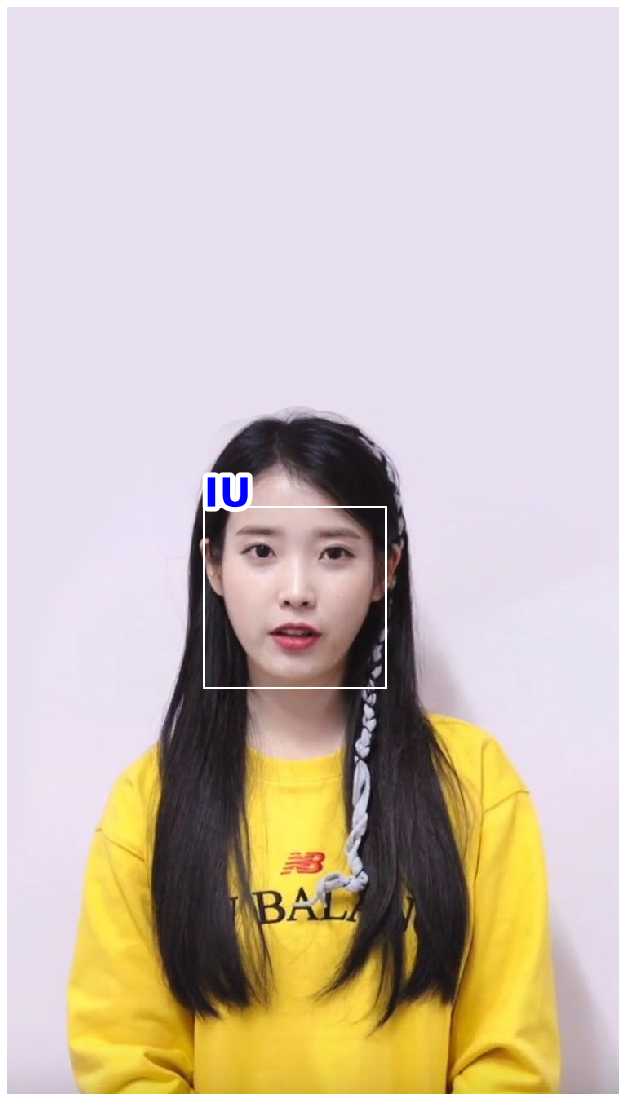

In [31]:
fig, ax = plt.subplots(1, figsize=(20, 20))
ax.imshow(img_rgb)

for i, desc in enumerate(descriptors):
    
    found = False
    for name, saved_desc in descs.items():
        # 유클리드 거리를 계산하여 0.6 이하면 해당 레이블값
        dist = np.linalg.norm([desc] - saved_desc, axis=1)

        if dist < 0.6:
            found = True
            
            # 해당 이름을 입력
            text = ax.text(rects[i][0][0], rects[i][0][1], name,
                    color='b', fontsize=40, fontweight='bold')
            text.set_path_effects([path_effects.Stroke(linewidth=10, foreground='white'), path_effects.Normal()])
            # 얼굴 부분을 잡는다.
            rect = patches.Rectangle(rects[i][0],
                                 rects[i][1][1] - rects[i][0][1],
                                 rects[i][1][0] - rects[i][0][0],
                                 linewidth=2, edgecolor='w', facecolor='none')
            ax.add_patch(rect)

            break
    
    if not found:
        ax.text(rects[i][0][0], rects[i][0][1], 'unknown',
                color='r', fontsize=20, fontweight='bold')
        rect = patches.Rectangle(rects[i][0],
                             rects[i][1][1] - rects[i][0][1],
                             rects[i][1][0] - rects[i][0][0],
                             linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

plt.axis('off')
plt.savefig('result/output.png')
plt.show()